In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

/home/shuzh/.local/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [13]:
### load time event data-time event analysis

#time_event = pd.read_csv('./cli/ekdm_final_TCGA_clinical_TNBC.csv')
time_event = pd.read_csv('./cli/ekdm_final_TCGA_clinical_luma.csv')

#time_event = pd.read_csv('./cli/metabric_clin_tnbc.csv')
#time_event  = pd.read_csv('./cli/metabric_clin_luma.csv')

In [14]:
time_event

,new_id,old_id,ER Status,PR Status,HER2 Status,time,event
0,0,0,Positive,Positive,Negative,132.95,0
1,1,3,Positive,Positive,Negative,48.52,1
2,2,4,Positive,Negative,Negative,9.95,0
3,3,5,Positive,Negative,Negative,8.51,0
4,4,6,Positive,Positive,Negative,14.36,0
...,...,...,...,...,...,...,...
594,594,947,Positive,Positive,Negative,29.01,0
595,595,948,Positive,Positive,Negative,15.34,0
596,596,949,Positive,Positive,Negative,16.03,0
597,597,950,Positive,Positive,Negative,107.98,0


In [15]:
time  = time_event['time'].values.squeeze()
event = time_event['event'].values.squeeze()

In [16]:
len(time)

599

In [17]:
# ## TCGA - Good TNBC
# cohort     = [3, 9, 10, 11, 14, 24, 33, 38, 45, 46, 51, 55, 58, 70, 72, 79, 80, 93, 95, 109, 115, 116, 121, 124, 129, 131, 135, 152, 157]
# not_cohort = [0, 1, 2, 4, 5, 6, 7, 8, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 47, 48, 49, 50, 52, 53, 54, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 73, 74, 75, 76, 77, 78, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 110, 111, 112, 113, 114, 117, 118, 119, 120, 122, 123, 125, 126, 127, 128, 130, 132, 133, 134, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 158]
# dataset_name = "TCGA" ##159


# ## TCGA - Bad Lum-A
cohort     = [1, 3, 6, 19, 33, 36, 41, 46, 55, 56, 57, 63, 65, 66, 71, 79, 87, 91, 99, 103, 105, 135, 163, 168, 170, 171, 215, 220, 230, 241, 242, 243, 256, 261, 270, 271, 272, 286, 290, 292, 301, 302, 308, 311, 317, 318, 324, 329, 332, 344, 358, 363, 371, 391, 392, 397, 430, 431, 432, 484, 488, 490, 507, 510, 518, 530, 538, 550, 554, 558, 569, 570, 582]
not_cohort = [0, 2, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 37, 38, 39, 40, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 58, 59, 60, 61, 62, 64, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 104, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 164, 165, 166, 167, 169, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 216, 217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 257, 258, 259, 260, 262, 263, 264, 265, 266, 267, 268, 269, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 287, 288, 289, 291, 293, 294, 295, 296, 297, 298, 299, 300, 303, 304, 305, 306, 307, 309, 310, 312, 313, 314, 315, 316, 319, 320, 321, 322, 323, 325, 326, 327, 328, 330, 331, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 359, 360, 361, 362, 364, 365, 366, 367, 368, 369, 370, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 393, 394, 395, 396, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 485, 486, 487, 489, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 508, 509, 511, 512, 513, 514, 515, 516, 517, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 531, 532, 533, 534, 535, 536, 537, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 551, 552, 553, 555, 556, 557, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598]
dataset_name = "TCGA" ### 599



# ## METABRIC - Good TNBC
# cohort     = [6, 10, 17, 32, 33, 50, 52, 60, 68, 72, 73, 78, 82, 84, 87, 94, 97, 98, 107, 111, 112, 114, 124, 125, 126, 129, 132, 136, 142, 144, 149, 159, 169, 172, 177, 180, 181, 185, 190, 194, 196, 197, 211, 213, 217, 218, 219, 222, 229, 234, 244, 245, 246, 256, 259, 264, 269, 276, 278, 282, 283, 288, 295, 296]
# not_cohort = [0, 1, 2, 3, 4, 5, 7, 8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 74, 75, 76, 77, 79, 80, 81, 83, 85, 86, 88, 89, 90, 91, 92, 93, 95, 96, 99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 113, 115, 116, 117, 118, 119, 120, 121, 122, 123, 127, 128, 130, 131, 133, 134, 135, 137, 138, 139, 140, 141, 143, 145, 146, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 173, 174, 175, 176, 178, 179, 182, 183, 184, 186, 187, 188, 189, 191, 192, 193, 195, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 212, 214, 215, 216, 220, 221, 223, 224, 225, 226, 227, 228, 230, 231, 232, 233, 235, 236, 237, 238, 239, 240, 241, 242, 243, 247, 248, 249, 250, 251, 252, 253, 254, 255, 257, 258, 260, 261, 262, 263, 265, 266, 267, 268, 270, 271, 272, 273, 274, 275, 277, 279, 280, 281, 284, 285, 286, 287, 289, 290, 291, 292, 293, 294, 297, 298]
# dataset_name = "METABRIC" ##299


## METABRIC - Bad Lum-A
#cohort     = [27, 73, 75, 86, 94, 98, 110, 123, 130, 141, 155, 164, 172, 187, 194, 200, 206, 219, 221, 243, 267, 272, 273, 282, 299, 323, 355, 375, 386, 387, 388, 397, 426, 429, 436, 443, 444, 447, 461, 468, 483, 507, 526, 528, 537, 559, 568, 578, 588, 592, 625, 626, 652, 654, 662, 666, 671, 674, 686, 707, 712, 722, 724, 729, 739, 745, 746, 758, 770, 776, 792, 829, 864, 889, 911, 920, 921, 925, 926, 928, 961, 970, 980, 984, 1000, 1026, 1027, 1031, 1037, 1044, 1081, 1130, 1133, 1143, 1153, 1158, 1176, 1182, 1191, 1209, 1235, 1258, 1262, 1267, 1297, 1309, 1344, 1349, 1362, 1365]
#not_cohort = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 156, 157, 158, 159, 160, 161, 162, 163, 165, 166, 167, 168, 169, 170, 171, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 188, 189, 190, 191, 192, 193, 195, 196, 197, 198, 199, 201, 202, 203, 204, 205, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 220, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 268, 269, 270, 271, 274, 275, 276, 277, 278, 279, 280, 281, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 389, 390, 391, 392, 393, 394, 395, 396, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 427, 428, 430, 431, 432, 433, 434, 435, 437, 438, 439, 440, 441, 442, 445, 446, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 462, 463, 464, 465, 466, 467, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 527, 529, 530, 531, 532, 533, 534, 535, 536, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 560, 561, 562, 563, 564, 565, 566, 567, 569, 570, 571, 572, 573, 574, 575, 576, 577, 579, 580, 581, 582, 583, 584, 585, 586, 587, 589, 590, 591, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 653, 655, 656, 657, 658, 659, 660, 661, 663, 664, 665, 667, 668, 669, 670, 672, 673, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 708, 709, 710, 711, 713, 714, 715, 716, 717, 718, 719, 720, 721, 723, 725, 726, 727, 728, 730, 731, 732, 733, 734, 735, 736, 737, 738, 740, 741, 742, 743, 744, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 771, 772, 773, 774, 775, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 912, 913, 914, 915, 916, 917, 918, 919, 922, 923, 924, 927, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 962, 963, 964, 965, 966, 967, 968, 969, 971, 972, 973, 974, 975, 976, 977, 978, 979, 981, 982, 983, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1028, 1029, 1030, 1032, 1033, 1034, 1035, 1036, 1038, 1039, 1040, 1041, 1042, 1043, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1131, 1132, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1154, 1155, 1156, 1157, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1177, 1178, 1179, 1180, 1181, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1259, 1260, 1261, 1263, 1264, 1265, 1266, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1345, 1346, 1347, 1348, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1361, 1363, 1364, 1366, 1367, 1368]
#dataset_name = "METABRIC" ###1369

In [136]:
# naming = []

# for i in range(0,299):
#     if i in cohort:
#         naming.append('cohort')
#     else:
#         naming.append('not_cohort')

In [137]:
# naming

In [18]:
time_ = time[cohort]
time_other = time[not_cohort]

event_ = event[cohort]
event_other = event[not_cohort]

In [19]:
len(time_), len(time_other), len(event_), len(event_other)

(73, 526, 73, 526)

In [20]:
results = logrank_test(time_, time_other, event_, event_other)
results = results.p_value
print(results)

0.028391667311612325


In [21]:
dataset_name

'TCGA'

In [22]:
# ### TNBC


# fig, ax = plt.subplots(ncols=1, figsize=(12,12))

# kmf = KaplanMeierFitter()
# for i in range(1,3):
#     if i==1:
#         kmf.fit(time_,event_,label='TNBC (Good Survival) equivalent ')#+'(n='+str(len(time_7))+')')
#     elif i==2:
#         kmf.fit(time_other,event_other,label='TNBC (Other)')#+'(n='+str(len(time_other))+')')
#     kmf.plot(show_censors=True,ci_show=False, linewidth=4)
    

# ax.set_ylim(-0.1, 1.10)
# #ax.set_ylim(-10, 280)
# ax.set_xticks(np.arange(0, max(max(time_),max(time_other))+10, 20))
# ax.set_xlabel('Overall Survival (months)', fontsize = 26)
# ax.legend(loc=3, prop={'size': 20})
# ax.set_ylabel('Probability of survival', fontsize = 26)
# #ax.text(220, 0.99,'p-value: ' +str('%.2g'%(results)),  bbox=dict(facecolor='red', alpha=0.3), fontsize=26) ##metabric
# ax.text(80, 0.99,'p-value: ' +str('%.2g'%(results)),  bbox=dict(facecolor='red', alpha=0.3), fontsize=26)  ## tcga
# ax.tick_params(axis='x', labelsize=14)
# ax.tick_params(axis='y', labelsize=26)
# #plt.savefig('KMplots/'+dataset_name+'-Good-TNBC_feb2022.png', dpi=600, bbox_inches='tight')

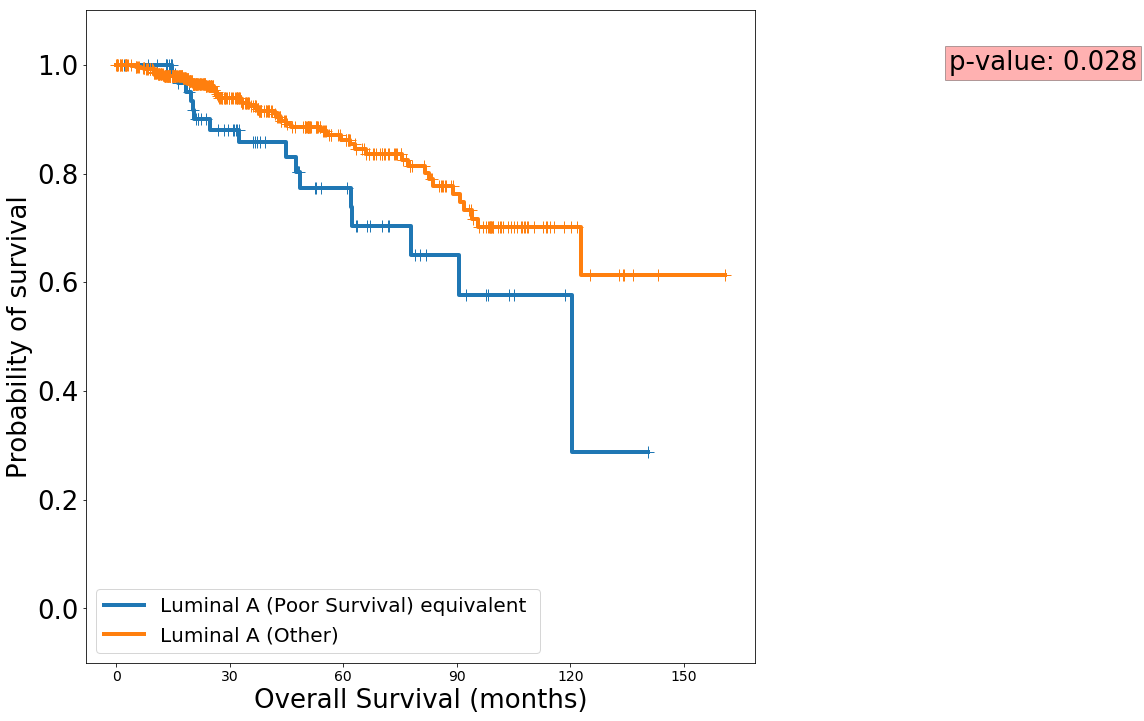

In [23]:
#### LumA



fig, ax = plt.subplots(ncols=1, figsize=(12,12))

kmf = KaplanMeierFitter()
for i in range(1,3):
    if i==1:
        kmf.fit(time_,event_,label='Luminal A (Poor Survival) equivalent ')#+'(n='+str(len(time_7))+')')
    elif i==2:
        kmf.fit(time_other,event_other,label='Luminal A (Other)')#+'(n='+str(len(time_other))+')')
    kmf.plot(show_censors=True,ci_show=False, linewidth=4)
    

ax.set_ylim(-0.1, 1.10)
#ax.set_ylim(-10, 280)
ax.legend(loc=3, prop={'size': 20})
ax.set_xticks(np.arange(0, max(max(time_),max(time_other))+10, 30))
ax.set_xlabel('Overall Survival (months)', fontsize = 26)
ax.set_ylabel('Probability of survival', fontsize = 26)
#ax.set_title('Dataset: '+ dataset_name+ '; p-value: ' +str('%.2g'%(results)), fontsize=16)
ax.text(220, 0.99,'p-value: ' +str('%.2g'%(results)),  bbox=dict(facecolor='red', alpha=0.3), fontsize=26) ##metabric
#ax.text(110, 0.99,'p-value: ' +str('%.2g'%(results)),  bbox=dict(facecolor='red', alpha=0.3), fontsize=26)  ## tcga
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=26)
plt.savefig('KMplots/'+dataset_name+'-Bad-LuminalAfeb2022.png', dpi=600, bbox_inches='tight')

In [ ]:
# #### old KM plot code
# fig, ax = plt.subplots(ncols=1, figsize=(18,18))
# kmf = KaplanMeierFitter()
# for i in range(1,5):
#     if i==1:
#         kmf.fit(time[luminal_A],event_observed=event[luminal_A],label='Luminal A')#+'(n='+str(len(luminal_A))+')')
#     elif i==2:
#         kmf.fit(time[luminal_B],event_observed=event[luminal_B],label='Luminal B')#+'(n='+str(len(luminal_B))+')')
#     elif i==3:
#         kmf.fit(time[tnbc],event_observed=event[tnbc],label='TNBC')#+'(n='+str(len(tnbc))+')')
#     elif i==4:
#         kmf.fit(time[her2_enrich],event_observed=event[her2_enrich],label='HER2 Enriched')#+'(n='+str(len(her2_enrich))+')')
#     #kmf.plot(show_censors=False,ci_show=False)
#     kmf.plot(show_censors=True,ci_show=False, linewidth = 4)
# #ax.text(100, 1.00, 'p-value = 8.6e-06', bbox=dict(facecolor='red', alpha=0.3), fontsize=14)
# #ax.text(100, 0.96, 'C-index = 0.797', bbox=dict(facecolor='red', alpha=0.3), fontsize=14)
# ##ax.text(172, 0.84, 'logrank p-value = ' +str('%.3g'%(result.p_value)), bbox=dict(facecolor='red', alpha=0.3), fontsize=11)
# ax.set_xlabel('Overall Survival (months)', fontsize = 30)
# ax.set_ylabel('Probability of survival', fontsize = 30)
# ax.set_ylim(0.2, 1.05)
# ax.legend(loc=4, prop={'size': 28})
# #ax.set_title('Kaplan-Meier Analysis | Clinicopathological Subtypes | Overall Survival', fontweight = 'bold', fontsize = 14)
# ax.text(165, 0.98, 'p-value = 0.001 \nC-index = 0.63', bbox=dict(facecolor='red', alpha=0.3), fontsize=36)
# #ax.text(100, 0.96, 'C-index = 0.797', bbox=dict(facecolor='red', alpha=0.3), fontsize=14)
# #ax.text(170, 0.91, 'logrank p-value = ' +str('%.3g'%(result.p_value)), bbox=dict(facecolor='red', alpha=0.3), fontsize=11)
# ax.tick_params(axis='x', labelsize=30)
# ax.tick_params(axis='y', labelsize=30)
# plt.savefig('KMplots/KMPlot_Molecular_Subtype_Status_OS_28feb2022.png', dpi=800, bbox_inches='tight')

In [370]:
############################## for our data

time_event_ours = pd.read_csv('ours/clinical.csv')


In [371]:
time_event_ours

,time,event
0,33,1
1,101,0
2,23,1
3,63,0
4,79,0
...,...,...
254,41,1
255,144,0
256,141,0
257,169,0


In [372]:
good_tnbc = [7,14, 19, 21, 30, 71, 75, 83, 84, 102, 103, 107, 128, 135, 142, 148, 159] #use
not_cohort_good_tnbc = [33, 49, 56, 60, 61, 78, 97, 99, 106, 108, 120, 126, 151, 152, 156, 160, 163, 172, 174, 181, 196, 208, 209, 220, 245]


# bad_luma =       [3, 10, 22, 23, 27, 64, 80, 96, 100, 117, 130, 132, 154, 200, 238, 240, 243, 254] #use
# not_cohort_bad_luma = [0, 1, 2, 4, 5, 6, 8, 9, 12, 15, 16, 17, 18, 20, 28, 29, 31, 32, 35, 37, 38, 39, 40, 41, 45, 47, 48, 50, 51, 52, 53, 54, 55, 58, 59, 62, 63, 66, 67, 68, 70, 73, 74, 77, 79, 82, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 98, 101, 104, 105, 109, 110, 111, 112, 114, 116, 119, 121, 122, 123, 127, 129, 134, 136, 137, 138, 141, 143, 144, 145, 146, 150, 153, 157, 158, 161, 164, 165, 166, 167, 170, 171, 176, 177, 178, 179, 182, 183, 184, 185, 186, 187, 188, 189, 190, 192, 193, 194, 198, 199, 202, 203, 205, 206, 213, 214, 215, 217, 218, 219, 221, 222, 224, 225, 226, 227, 228, 229, 231, 232, 234, 235, 236, 237, 239, 241, 242, 244, 246, 247, 249, 250, 251, 252, 255, 256, 257, 258]


In [373]:
cohort = good_tnbc
not_cohort = not_cohort_good_tnbc



# cohort = bad_luma
# not_cohort = not_cohort_bad_luma

In [374]:
time = time_event_ours['time'].values
event= time_event_ours['event'].values

In [375]:
time_ = time[cohort]
time_other = time[not_cohort]

event_ = event[cohort]
event_other = event[not_cohort]

results = logrank_test(time_, time_other, event_, event_other)
results = results.p_value

In [376]:
print(not_cohort)

[33, 49, 56, 60, 61, 78, 97, 99, 106, 108, 120, 126, 151, 152, 156, 160, 163, 172, 174, 181, 196, 208, 209, 220, 245]


In [377]:
time_other

array([144,  42,  53,  50,   8,  84,  12,  44, 104,  46,  44,  37,  37,
        36,   1,  10,  54,  20,   4,  28, 104,  74,   6,   3,  23],
      dtype=int64)

In [378]:
event_other

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [379]:
list(zip(cohort, time_, event_))

[(7, 36, 1),
 (14, 87, 0),
 (19, 90, 0),
 (21, 1, 0),
 (30, 95, 0),
 (71, 33, 0),
 (75, 89, 0),
 (83, 95, 0),
 (84, 1, 0),
 (102, 13, 0),
 (103, 0, 0),
 (107, 54, 0),
 (128, 1, 0),
 (135, 98, 0),
 (142, 25, 0),
 (148, 58, 0),
 (159, 51, 1)]

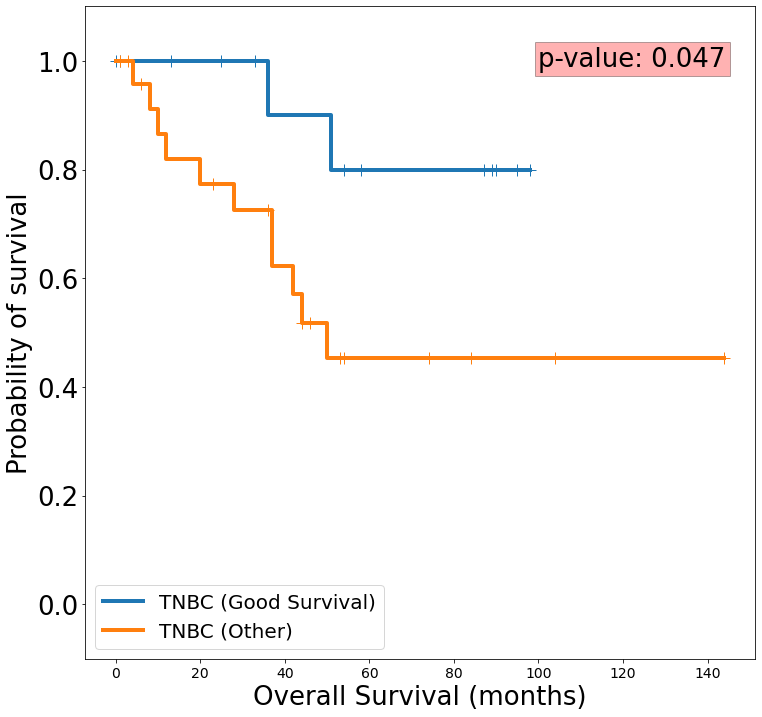

In [382]:
### TNBC


fig, ax = plt.subplots(ncols=1, figsize=(12,12))

kmf = KaplanMeierFitter()
for i in range(1,3):
    if i==1:
        kmf.fit(time_,event_,label='TNBC (Good Survival)')#+'(n='+str(len(time_7))+')')
    elif i==2:
        kmf.fit(time_other,event_other,label='TNBC (Other)')#+'(n='+str(len(time_other))+')')
    kmf.plot(show_censors=True,ci_show=False, linewidth=4)
    

ax.set_ylim(-0.1, 1.10)
#ax.set_ylim(-10, 280)
ax.set_xticks(np.arange(0, max(max(time_),max(time_other))+10, 20))
ax.set_xlabel('Overall Survival (months)', fontsize = 26)
ax.legend(loc=3, prop={'size': 20})
ax.set_ylabel('Probability of survival', fontsize = 26)
#ax.text(220, 0.99,'p-value: ' +str('%.2g'%(results)),  bbox=dict(facecolor='red', alpha=0.3), fontsize=26) ##metabric
ax.text(100, 0.99,'p-value: ' +str('%.2g'%(results)),  bbox=dict(facecolor='red', alpha=0.3), fontsize=26)  ## tcga
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=26)
plt.savefig('KMplots/'+dataset_name+'-Good-TNBC_feb2022.png', dpi=600, bbox_inches='tight')

In [324]:
# #### LumA

# dataset_name = 'single_cell'

# fig, ax = plt.subplots(ncols=1, figsize=(12,12))

# kmf = KaplanMeierFitter()
# for i in range(1,3):
#     if i==1:
#         kmf.fit(time_,event_,label='Luminal A (Poor Survival)')#+'(n='+str(len(time_7))+')')
#     elif i==2:
#         kmf.fit(time_other,event_other,label='Luminal A (Other)')#+'(n='+str(len(time_other))+')')
#     kmf.plot(show_censors=True,ci_show=False, linewidth=4)
    

# ax.set_ylim(-0.1, 1.10)
# #ax.set_ylim(-10, 280)
# ax.legend(loc=3, prop={'size': 20})
# ax.set_xticks(np.arange(0, max(max(time_),max(time_other))+10, 30))
# ax.set_xlabel('Overall Survival (months)', fontsize = 26)
# ax.set_ylabel('Probability of survival', fontsize = 26)
# #ax.set_title('Dataset: '+ dataset_name+ '; p-value: ' +str('%.2g'%(results)), fontsize=16)
# ax.text(120, 0.99,'p-value: ' +str('%.2g'%(results)),  bbox=dict(facecolor='red', alpha=0.3), fontsize=26) ##metabric
# #ax.text(110, 0.99,'p-value: ' +str('%.2g'%(results)),  bbox=dict(facecolor='red', alpha=0.3), fontsize=26)  ## tcga
# ax.tick_params(axis='x', labelsize=14)
# ax.tick_params(axis='y', labelsize=26)
# plt.savefig('KMplots/'+dataset_name+'-Bad-LuminalAfeb2022.png', dpi=600, bbox_inches='tight')